<a href="https://colab.research.google.com/github/sheetalra/ADSA-project/blob/main/Copy_of_Bert1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loughran-Mcdonald dictionary based sentiment analysis

In [107]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("all-data.csv", encoding='latin-1', header = None)
df.columns = ["Sentiment", "Headline"]
df.head(2)

,Sentiment,Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...


In [108]:
df.sample(5)

,Sentiment,Headline
3285,neutral,The MET is located in the Central Business Dis...
921,positive,We are now in a position to pursue novel clini...
2469,positive,Growth is expected to continue in 2008 .
2929,neutral,He is a Chartered Accountant in British Columb...
3983,neutral,With the government exempting certain stainles...


In [109]:
import re

# Loughran and McDonald Sentiment Word Lists (https://sraf.nd.edu/textual-analysis/resources/)
lmdict = {'Negative': ['abandon', 'abandoned', 'abandoning', 'abandonment', 'abandonments', 'abandons', 'abdicated',
                       'abdicates', 'abdicating', 'abdication', 'abdications', 'aberrant', 'aberration', 'aberrational',
                       'aberrations', 'abetting', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abolish',
                       'abolished', 'abolishes', 'abolishing', 'abrogate', 'abrogated', 'abrogates', 'abrogating',
                       'abrogation', 'abrogations', 'abrupt', 'abruptly', 'abruptness', 'absence', 'absences',
                       'absenteeism', 'abuse', 'abused', 'abuses', 'abusing', 'abusive', 'abusively', 'abusiveness',
                       'accident', 'accidental', 'accidentally', 'accidents', 'accusation', 'accusations', 'accuse',
                       'accused', 'accuses', 'accusing', 'acquiesce', 'acquiesced', 'acquiesces', 'acquiescing',
                       'acquit', 'acquits', 'acquittal', 'acquittals', 'acquitted', 'acquitting', 'adulterate',
                       'adulterated', 'adulterating', 'adulteration', 'adulterations', 'adversarial', 'adversaries',
                       'adversary', 'adverse', 'adversely', 'adversities', 'adversity', 'aftermath', 'aftermaths',
                       'against', 'aggravate', 'aggravated', 'aggravates', 'aggravating', 'aggravation', 'aggravations',
                       'alerted', 'alerting', 'alienate', 'alienated', 'alienates', 'alienating', 'alienation',
                       'alienations', 'allegation', 'allegations', 'allege', 'alleged', 'allegedly', 'alleges',
                       'alleging', 'annoy', 'annoyance', 'annoyances', 'annoyed', 'annoying', 'annoys', 'annul',
                       'annulled', 'annulling', 'annulment', 'annulments', 'annuls', 'anomalies', 'anomalous',
                       'anomalously', 'anomaly', 'anticompetitive', 'antitrust', 'argue', 'argued', 'arguing',
                       'argument', 'argumentative', 'arguments', 'arrearage', 'arrearages', 'arrears', 'arrest',
                       'arrested', 'arrests', 'artificially', 'assault', 'assaulted', 'assaulting', 'assaults',
                       'assertions', 'attrition', 'aversely', 'backdating', 'bad', 'bail', 'bailout', 'balk', 'balked',
                       'bankrupt', 'bankruptcies', 'bankruptcy', 'bankrupted', 'bankrupting', 'bankrupts', 'bans',
                       'barred', 'barrier', 'barriers', 'bottleneck', 'bottlenecks', 'boycott', 'boycotted',
                       'boycotting', 'boycotts', 'breach', 'breached', 'breaches', 'breaching', 'break', 'breakage',
                       'breakages', 'breakdown', 'breakdowns', 'breaking', 'breaks', 'bribe', 'bribed', 'briberies',
                       'bribery', 'bribes', 'bribing', 'bridge', 'broken', 'burden', 'burdened', 'burdening', 'burdens',
                       'burdensome', 'burned', 'calamities', 'calamitous', 'calamity', 'cancel', 'canceled',
                       'canceling', 'cancellation', 'cancellations', 'cancelled', 'cancelling', 'cancels', 'careless',
                       'carelessly', 'carelessness', 'catastrophe', 'catastrophes', 'catastrophic', 'catastrophically',
                       'caution', 'cautionary', 'cautioned', 'cautioning', 'cautions', 'cease', 'ceased', 'ceases',
                       'ceasing', 'censure', 'censured', 'censures', 'censuring', 'challenge', 'challenged',
                       'challenges', 'challenging', 'chargeoffs', 'circumvent', 'circumvented', 'circumventing',
                       'circumvention', 'circumventions', 'circumvents', 'claiming', 'claims', 'clawback', 'closed',
                       'closeout', 'closeouts', 'closing', 'closings', 'closure', 'closures', 'coerce', 'coerced',
                       'coerces', 'coercing', 'coercion', 'coercive', 'collapse', 'collapsed', 'collapses',
                       'collapsing', 'collision', 'collisions', 'collude', 'colluded', 'colludes', 'colluding',
                       'collusion', 'collusions', 'collusive', 'complain', 'complained', 'complaining', 'complains',
                       'complaint', 'complaints', 'complicate', 'complicated', 'complicates', 'complicating',
                       'complication', 'complications', 'compulsion', 'concealed', 'concealing', 'concede', 'conceded',
                       'concedes', 'conceding', 'concern', 'concerned', 'concerns', 'conciliating', 'conciliation',
                       'conciliations', 'condemn', 'condemnation', 'condemnations', 'condemned', 'condemning',
                       'condemns', 'condone', 'condoned', 'confess', 'confessed', 'confesses', 'confessing',
                       'confession', 'confine', 'confined', 'confinement', 'confinements', 'confines', 'confining',
                       'confiscate', 'confiscated', 'confiscates', 'confiscating', 'confiscation', 'confiscations',
                       'conflict', 'conflicted', 'conflicting', 'conflicts', 'confront', 'confrontation',
                       'confrontational', 'confrontations', 'confronted', 'confronting', 'confronts', 'confuse',
                       'confused', 'confuses', 'confusing', 'confusingly', 'confusion', 'conspiracies', 'conspiracy',
                       'conspirator', 'conspiratorial', 'conspirators', 'conspire', 'conspired', 'conspires',
                       'conspiring', 'contempt', 'contend', 'contended', 'contending', 'contends', 'contention',
                       'contentions', 'contentious', 'contentiously', 'contested', 'contesting', 'contraction',
                       'contractions', 'contradict', 'contradicted', 'contradicting', 'contradiction', 'contradictions',
                       'contradictory', 'contradicts', 'contrary', 'controversial', 'controversies', 'controversy',
                       'convict', 'convicted', 'convicting', 'conviction', 'convictions', 'corrected', 'correcting',
                       'correction', 'corrections', 'corrects', 'corrupt', 'corrupted', 'corrupting', 'corruption',
                       'corruptions', 'corruptly', 'corruptness', 'costly', 'counterclaim', 'counterclaimed',
                       'counterclaiming', 'counterclaims', 'counterfeit', 'counterfeited', 'counterfeiter',
                       'counterfeiters', 'counterfeiting', 'counterfeits', 'countermeasure', 'countermeasures', 'crime',
                       'crimes', 'criminal', 'criminally', 'criminals', 'crises', 'crisis', 'critical', 'critically',
                       'criticism', 'criticisms', 'criticize', 'criticized', 'criticizes', 'criticizing', 'crucial',
                       'crucially', 'culpability', 'culpable', 'culpably', 'cumbersome', 'curtail', 'curtailed',
                       'curtailing', 'curtailment', 'curtailments', 'curtails', 'cut', 'cutback', 'cutbacks',
                       'cyberattack', 'cyberattacks', 'cyberbullying', 'cybercrime', 'cybercrimes', 'cybercriminal',
                       'cybercriminals', 'damage', 'damaged', 'damages', 'damaging', 'dampen', 'dampened', 'danger',
                       'dangerous', 'dangerously', 'dangers', 'deadlock', 'deadlocked', 'deadlocking', 'deadlocks',
                       'deadweight', 'deadweights', 'debarment', 'debarments', 'debarred', 'deceased', 'deceit',
                       'deceitful', 'deceitfulness', 'deceive', 'deceived', 'deceives', 'deceiving', 'deception',
                       'deceptions', 'deceptive', 'deceptively', 'decline', 'declined', 'declines', 'declining',
                       'deface', 'defaced', 'defacement', 'defamation', 'defamations', 'defamatory', 'defame',
                       'defamed', 'defames', 'defaming', 'default', 'defaulted', 'defaulting', 'defaults', 'defeat',
                       'defeated', 'defeating', 'defeats', 'defect', 'defective', 'defects', 'defend', 'defendant',
                       'defendants', 'defended', 'defending', 'defends', 'defensive', 'defer', 'deficiencies',
                       'deficiency', 'deficient', 'deficit', 'deficits', 'defraud', 'defrauded', 'defrauding',
                       'defrauds', 'defunct', 'degradation', 'degradations', 'degrade', 'degraded', 'degrades',
                       'degrading', 'delay', 'delayed', 'delaying', 'delays', 'deleterious', 'deliberate',
                       'deliberated', 'deliberately', 'delinquencies', 'delinquency', 'delinquent', 'delinquently',
                       'delinquents', 'delist', 'delisted', 'delisting', 'delists', 'demise', 'demised', 'demises',
                       'demising', 'demolish', 'demolished', 'demolishes', 'demolishing', 'demolition', 'demolitions',
                       'demote', 'demoted', 'demotes', 'demoting', 'demotion', 'demotions', 'denial', 'denials',
                       'denied', 'denies', 'denigrate', 'denigrated', 'denigrates', 'denigrating', 'denigration',
                       'deny', 'denying', 'deplete', 'depleted', 'depletes', 'depleting', 'depletion', 'depletions',
                       'deprecation', 'depress', 'depressed', 'depresses', 'depressing', 'deprivation', 'deprive',
                       'deprived', 'deprives', 'depriving', 'derelict', 'dereliction', 'derogatory', 'destabilization',
                       'destabilize', 'destabilized', 'destabilizing', 'destroy', 'destroyed', 'destroying', 'destroys',
                       'destruction', 'destructive', 'detain', 'detained', 'detention', 'detentions', 'deter',
                       'deteriorate', 'deteriorated', 'deteriorates', 'deteriorating', 'deterioration',
                       'deteriorations', 'deterred', 'deterrence', 'deterrences', 'deterrent', 'deterrents',
                       'deterring', 'deters', 'detract', 'detracted', 'detracting', 'detriment', 'detrimental',
                       'detrimentally', 'detriments', 'devalue', 'devalued', 'devalues', 'devaluing', 'devastate',
                       'devastated', 'devastating', 'devastation', 'deviate', 'deviated', 'deviates', 'deviating',
                       'deviation', 'deviations', 'devolve', 'devolved', 'devolves', 'devolving', 'difficult',
                       'difficulties', 'difficultly', 'difficulty', 'diminish', 'diminished', 'diminishes',
                       'diminishing', 'diminution', 'disadvantage', 'disadvantaged', 'disadvantageous', 'disadvantages',
                       'disaffiliation', 'disagree', 'disagreeable', 'disagreed', 'disagreeing', 'disagreement',
                       'disagreements', 'disagrees', 'disallow', 'disallowance', 'disallowances', 'disallowed',
                       'disallowing', 'disallows', 'disappear', 'disappearance', 'disappearances', 'disappeared',
                       'disappearing', 'disappears', 'disappoint', 'disappointed', 'disappointing', 'disappointingly',
                       'disappointment', 'disappointments', 'disappoints', 'disapproval', 'disapprovals', 'disapprove',
                       'disapproved', 'disapproves', 'disapproving', 'disassociates', 'disassociating',
                       'disassociation', 'disassociations', 'disaster', 'disasters', 'disastrous', 'disastrously',
                       'disavow', 'disavowal', 'disavowed', 'disavowing', 'disavows', 'disciplinary', 'disclaim',
                       'disclaimed', 'disclaimer', 'disclaimers', 'disclaiming', 'disclaims', 'disclose', 'disclosed',
                       'discloses', 'disclosing', 'discontinuance', 'discontinuances', 'discontinuation',
                       'discontinuations', 'discontinue', 'discontinued', 'discontinues', 'discontinuing', 'discourage',
                       'discouraged', 'discourages', 'discouraging', 'discredit', 'discredited', 'discrediting',
                       'discredits', 'discrepancies', 'discrepancy', 'disfavor', 'disfavored', 'disfavoring',
                       'disfavors', 'disgorge', 'disgorged', 'disgorgement', 'disgorgements', 'disgorges', 'disgorging',
                       'disgrace', 'disgraceful', 'disgracefully', 'dishonest', 'dishonestly', 'dishonesty', 'dishonor',
                       'dishonorable', 'dishonorably', 'dishonored', 'dishonoring', 'dishonors', 'disincentives',
                       'disinterested', 'disinterestedly', 'disinterestedness', 'disloyal', 'disloyally', 'disloyalty',
                       'dismal', 'dismally', 'dismiss', 'dismissal', 'dismissals', 'dismissed', 'dismisses',
                       'dismissing', 'disorderly', 'disparage', 'disparaged', 'disparagement', 'disparagements',
                       'disparages', 'disparaging', 'disparagingly', 'disparities', 'disparity', 'displace',
                       'displaced', 'displacement', 'displacements', 'displaces', 'displacing', 'dispose', 'dispossess',
                       'dispossessed', 'dispossesses', 'dispossessing', 'disproportion', 'disproportional',
                       'disproportionate', 'disproportionately', 'dispute', 'disputed', 'disputes', 'disputing',
                       'disqualification', 'disqualifications', 'disqualified', 'disqualifies', 'disqualify',
                       'disqualifying', 'disregard', 'disregarded', 'disregarding', 'disregards', 'disreputable',
                       'disrepute', 'disrupt', 'disrupted', 'disrupting', 'disruption', 'disruptions', 'disruptive',
                       'disrupts', 'dissatisfaction', 'dissatisfied', 'dissent', 'dissented', 'dissenter', 'dissenters',
                       'dissenting', 'dissents', 'dissident', 'dissidents', 'dissolution', 'dissolutions', 'distort',
                       'distorted', 'distorting', 'distortion', 'distortions', 'distorts', 'distract', 'distracted',
                       'distracting', 'distraction', 'distractions', 'distracts', 'distress', 'distressed', 'disturb',
                       'disturbance', 'disturbances', 'disturbed', 'disturbing', 'disturbs', 'diversion', 'divert',
                       'diverted', 'diverting', 'diverts', 'divest', 'divested', 'divesting', 'divestiture',
                       'divestitures', 'divestment', 'divestments', 'divests', 'divorce', 'divorced', 'divulge',
                       'divulged', 'divulges', 'divulging', 'doubt', 'doubted', 'doubtful', 'doubts', 'downgrade',
                       'downgraded', 'downgrades', 'downgrading', 'downsize', 'downsized', 'downsizes', 'downsizing',
                       'downsizings', 'downtime', 'downtimes', 'downturn', 'downturns', 'downward', 'downwards', 'drag',
                       'drastic', 'drastically', 'drawback', 'drawbacks', 'dropped', 'drought', 'droughts', 'duress',
                       'dysfunction', 'dysfunctional', 'dysfunctions', 'easing', 'egregious', 'egregiously', 'embargo',
                       'embargoed', 'embargoes', 'embargoing', 'embarrass', 'embarrassed', 'embarrasses',
                       'embarrassing', 'embarrassment', 'embarrassments', 'embezzle', 'embezzled', 'embezzlement',
                       'embezzlements', 'embezzler', 'embezzles', 'embezzling', 'encroach', 'encroached', 'encroaches',
                       'encroaching', 'encroachment', 'encroachments', 'encumber', 'encumbered', 'encumbering',
                       'encumbers', 'encumbrance', 'encumbrances', 'endanger', 'endangered', 'endangering',
                       'endangerment', 'endangers', 'enjoin', 'enjoined', 'enjoining', 'enjoins', 'erode', 'eroded',
                       'erodes', 'eroding', 'erosion', 'erratic', 'erratically', 'erred', 'erring', 'erroneous',
                       'erroneously', 'error', 'errors', 'errs', 'escalate', 'escalated', 'escalates', 'escalating',
                       'evade', 'evaded', 'evades', 'evading', 'evasion', 'evasions', 'evasive', 'evict', 'evicted',
                       'evicting', 'eviction', 'evictions', 'evicts', 'exacerbate', 'exacerbated', 'exacerbates',
                       'exacerbating', 'exacerbation', 'exacerbations', 'exaggerate', 'exaggerated', 'exaggerates',
                       'exaggerating', 'exaggeration', 'excessive', 'excessively', 'exculpate', 'exculpated',
                       'exculpates', 'exculpating', 'exculpation', 'exculpations', 'exculpatory', 'exonerate',
                       'exonerated', 'exonerates', 'exonerating', 'exoneration', 'exonerations', 'exploit',
                       'exploitation', 'exploitations', 'exploitative', 'exploited', 'exploiting', 'exploits', 'expose',
                       'exposed', 'exposes', 'exposing', 'expropriate', 'expropriated', 'expropriates', 'expropriating',
                       'expropriation', 'expropriations', 'expulsion', 'expulsions', 'extenuating', 'fail', 'failed',
                       'failing', 'failings', 'fails', 'failure', 'failures', 'fallout', 'false', 'falsely',
                       'falsification', 'falsifications', 'falsified', 'falsifies', 'falsify', 'falsifying', 'falsity',
                       'fatalities', 'fatality', 'fatally', 'fault', 'faulted', 'faults', 'faulty', 'fear', 'fears',
                       'felonies', 'felonious', 'felony', 'fictitious', 'fined', 'fines', 'fired', 'firing', 'flaw',
                       'flawed', 'flaws', 'forbid', 'forbidden', 'forbidding', 'forbids', 'force', 'forced', 'forcing',
                       'foreclose', 'foreclosed', 'forecloses', 'foreclosing', 'foreclosure', 'foreclosures', 'forego',
                       'foregoes', 'foregone', 'forestall', 'forestalled', 'forestalling', 'forestalls', 'forfeit',
                       'forfeited', 'forfeiting', 'forfeits', 'forfeiture', 'forfeitures', 'forgers', 'forgery',
                       'fraud', 'frauds', 'fraudulence', 'fraudulent', 'fraudulently', 'frivolous', 'frivolously',
                       'frustrate', 'frustrated', 'frustrates', 'frustrating', 'frustratingly', 'frustration',
                       'frustrations', 'fugitive', 'fugitives', 'gratuitous', 'gratuitously', 'grievance', 'grievances',
                       'grossly', 'groundless', 'guilty', 'halt', 'halted', 'hamper', 'hampered', 'hampering',
                       'hampers', 'harass', 'harassed', 'harassing', 'harassment', 'hardship', 'hardships', 'harm',
                       'harmed', 'harmful', 'harmfully', 'harming', 'harms', 'harsh', 'harsher', 'harshest', 'harshly',
                       'harshness', 'hazard', 'hazardous', 'hazards', 'hinder', 'hindered', 'hindering', 'hinders',
                       'hindrance', 'hindrances', 'hostile', 'hostility', 'hurt', 'hurting', 'idle', 'idled', 'idling',
                       'ignore', 'ignored', 'ignores', 'ignoring', 'ill', 'illegal', 'illegalities', 'illegality',
                       'illegally', 'illegible', 'illicit', 'illicitly', 'illiquid', 'illiquidity', 'imbalance',
                       'imbalances', 'immature', 'immoral', 'impair', 'impaired', 'impairing', 'impairment',
                       'impairments', 'impairs', 'impasse', 'impasses', 'impede', 'impeded', 'impedes', 'impediment',
                       'impediments', 'impeding', 'impending', 'imperative', 'imperfection', 'imperfections', 'imperil',
                       'impermissible', 'implicate', 'implicated', 'implicates', 'implicating', 'impossibility',
                       'impossible', 'impound', 'impounded', 'impounding', 'impounds', 'impracticable', 'impractical',
                       'impracticalities', 'impracticality', 'imprisonment', 'improper', 'improperly', 'improprieties',
                       'impropriety', 'imprudent', 'imprudently', 'inability', 'inaccessible', 'inaccuracies',
                       'inaccuracy', 'inaccurate', 'inaccurately', 'inaction', 'inactions', 'inactivate', 'inactivated',
                       'inactivates', 'inactivating', 'inactivation', 'inactivations', 'inactivity', 'inadequacies',
                       'inadequacy', 'inadequate', 'inadequately', 'inadvertent', 'inadvertently', 'inadvisability',
                       'inadvisable', 'inappropriate', 'inappropriately', 'inattention', 'incapable', 'incapacitated',
                       'incapacity', 'incarcerate', 'incarcerated', 'incarcerates', 'incarcerating', 'incarceration',
                       'incarcerations', 'incidence', 'incidences', 'incident', 'incidents', 'incompatibilities',
                       'incompatibility', 'incompatible', 'incompetence', 'incompetency', 'incompetent',
                       'incompetently', 'incompetents', 'incomplete', 'incompletely', 'incompleteness', 'inconclusive',
                       'inconsistencies', 'inconsistency', 'inconsistent', 'inconsistently', 'inconvenience',
                       'inconveniences', 'inconvenient', 'incorrect', 'incorrectly', 'incorrectness', 'indecency',
                       'indecent', 'indefeasible', 'indefeasibly', 'indict', 'indictable', 'indicted', 'indicting',
                       'indictment', 'indictments', 'ineffective', 'ineffectively', 'ineffectiveness', 'inefficiencies',
                       'inefficiency', 'inefficient', 'inefficiently', 'ineligibility', 'ineligible', 'inequitable',
                       'inequitably', 'inequities', 'inequity', 'inevitable', 'inexperience', 'inexperienced',
                       'inferior', 'inflicted', 'infraction', 'infractions', 'infringe', 'infringed', 'infringement',
                       'infringements', 'infringes', 'infringing', 'inhibited', 'inimical', 'injunction', 'injunctions',
                       'injure', 'injured', 'injures', 'injuries', 'injuring', 'injurious', 'injury', 'inordinate',
                       'inordinately', 'inquiry', 'insecure', 'insensitive', 'insolvencies', 'insolvency', 'insolvent',
                       'instability', 'insubordination', 'insufficiency', 'insufficient', 'insufficiently',
                       'insurrection', 'insurrections', 'intentional', 'interfere', 'interfered', 'interference',
                       'interferences', 'interferes', 'interfering', 'intermittent', 'intermittently', 'interrupt',
                       'interrupted', 'interrupting', 'interruption', 'interruptions', 'interrupts', 'intimidation',
                       'intrusion', 'invalid', 'invalidate', 'invalidated', 'invalidates', 'invalidating',
                       'invalidation', 'invalidity', 'investigate', 'investigated', 'investigates', 'investigating',
                       'investigation', 'investigations', 'involuntarily', 'involuntary', 'irreconcilable',
                       'irreconcilably', 'irrecoverable', 'irrecoverably', 'irregular', 'irregularities',
                       'irregularity', 'irregularly', 'irreparable', 'irreparably', 'irreversible', 'jeopardize',
                       'jeopardized', 'justifiable', 'kickback', 'kickbacks', 'knowingly', 'lack', 'lacked', 'lacking',
                       'lackluster', 'lacks', 'lag', 'lagged', 'lagging', 'lags', 'lapse', 'lapsed', 'lapses',
                       'lapsing', 'late', 'laundering', 'layoff', 'layoffs', 'lie', 'limitation', 'limitations',
                       'lingering', 'liquidate', 'liquidated', 'liquidates', 'liquidating', 'liquidation',
                       'liquidations', 'liquidator', 'liquidators', 'litigant', 'litigants', 'litigate', 'litigated',
                       'litigates', 'litigating', 'litigation', 'litigations', 'lockout', 'lockouts', 'lose', 'loses',
                       'losing', 'loss', 'losses', 'lost', 'lying', 'malfeasance', 'malfunction', 'malfunctioned',
                       'malfunctioning', 'malfunctions', 'malice', 'malicious', 'maliciously', 'malpractice',
                       'manipulate', 'manipulated', 'manipulates', 'manipulating', 'manipulation', 'manipulations',
                       'manipulative', 'markdown', 'markdowns', 'misapplication', 'misapplications', 'misapplied',
                       'misapplies', 'misapply', 'misapplying', 'misappropriate', 'misappropriated', 'misappropriates',
                       'misappropriating', 'misappropriation', 'misappropriations', 'misbranded', 'miscalculate',
                       'miscalculated', 'miscalculates', 'miscalculating', 'miscalculation', 'miscalculations',
                       'mischaracterization', 'mischief', 'misclassification', 'misclassifications', 'misclassified',
                       'misclassify', 'miscommunication', 'misconduct', 'misdated', 'misdemeanor', 'misdemeanors',
                       'misdirected', 'mishandle', 'mishandled', 'mishandles', 'mishandling', 'misinform',
                       'misinformation', 'misinformed', 'misinforming', 'misinforms', 'misinterpret',
                       'misinterpretation', 'misinterpretations', 'misinterpreted', 'misinterpreting', 'misinterprets',
                       'misjudge', 'misjudged', 'misjudges', 'misjudging', 'misjudgment', 'misjudgments', 'mislabel',
                       'mislabeled', 'mislabeling', 'mislabelled', 'mislabels', 'mislead', 'misleading', 'misleadingly',
                       'misleads', 'misled', 'mismanage', 'mismanaged', 'mismanagement', 'mismanages', 'mismanaging',
                       'mismatch', 'mismatched', 'mismatches', 'mismatching', 'misplaced', 'misprice', 'mispricing',
                       'mispricings', 'misrepresent', 'misrepresentation', 'misrepresentations', 'misrepresented',
                       'misrepresenting', 'misrepresents', 'miss', 'missed', 'misses', 'misstate', 'misstated',
                       'misstatement', 'misstatements', 'misstates', 'misstating', 'misstep', 'missteps', 'mistake',
                       'mistaken', 'mistakenly', 'mistakes', 'mistaking', 'mistrial', 'mistrials', 'misunderstand',
                       'misunderstanding', 'misunderstandings', 'misunderstood', 'misuse', 'misused', 'misuses',
                       'misusing', 'monopolistic', 'monopolists', 'monopolization', 'monopolize', 'monopolized',
                       'monopolizes', 'monopolizing', 'monopoly', 'moratoria', 'moratorium', 'moratoriums',
                       'mothballed', 'mothballing', 'negative', 'negatively', 'negatives', 'neglect', 'neglected',
                       'neglectful', 'neglecting', 'neglects', 'negligence', 'negligences', 'negligent', 'negligently',
                       'nonattainment', 'noncompetitive', 'noncompliance', 'noncompliances', 'noncompliant',
                       'noncomplying', 'nonconforming', 'nonconformities', 'nonconformity', 'nondisclosure',
                       'nonfunctional', 'nonpayment', 'nonpayments', 'nonperformance', 'nonperformances',
                       'nonperforming', 'nonproducing', 'nonproductive', 'nonrecoverable', 'nonrenewal', 'nuisance',
                       'nuisances', 'nullification', 'nullifications', 'nullified', 'nullifies', 'nullify',
                       'nullifying', 'objected', 'objecting', 'objection', 'objectionable', 'objectionably',
                       'objections', 'obscene', 'obscenity', 'obsolescence', 'obsolete', 'obstacle', 'obstacles',
                       'obstruct', 'obstructed', 'obstructing', 'obstruction', 'obstructions', 'offence', 'offences',
                       'offend', 'offended', 'offender', 'offenders', 'offending', 'offends', 'omission', 'omissions',
                       'omit', 'omits', 'omitted', 'omitting', 'onerous', 'opportunistic', 'opportunistically',
                       'oppose', 'opposed', 'opposes', 'opposing', 'opposition', 'oppositions', 'outage', 'outages',
                       'outdated', 'outmoded', 'overage', 'overages', 'overbuild', 'overbuilding', 'overbuilds',
                       'overbuilt', 'overburden', 'overburdened', 'overburdening', 'overcapacities', 'overcapacity',
                       'overcharge', 'overcharged', 'overcharges', 'overcharging', 'overcome', 'overcomes',
                       'overcoming', 'overdue', 'overestimate', 'overestimated', 'overestimates', 'overestimating',
                       'overestimation', 'overestimations', 'overload', 'overloaded', 'overloading', 'overloads',
                       'overlook', 'overlooked', 'overlooking', 'overlooks', 'overpaid', 'overpayment', 'overpayments',
                       'overproduced', 'overproduces', 'overproducing', 'overproduction', 'overrun', 'overrunning',
                       'overruns', 'overshadow', 'overshadowed', 'overshadowing', 'overshadows', 'overstate',
                       'overstated', 'overstatement', 'overstatements', 'overstates', 'overstating', 'oversupplied',
                       'oversupplies', 'oversupply', 'oversupplying', 'overtly', 'overturn', 'overturned',
                       'overturning', 'overturns', 'overvalue', 'overvalued', 'overvaluing', 'panic', 'panics',
                       'penalize', 'penalized', 'penalizes', 'penalizing', 'penalties', 'penalty', 'peril', 'perils',
                       'perjury', 'perpetrate', 'perpetrated', 'perpetrates', 'perpetrating', 'perpetration', 'persist',
                       'persisted', 'persistence', 'persistent', 'persistently', 'persisting', 'persists', 'pervasive',
                       'pervasively', 'pervasiveness', 'petty', 'picket', 'picketed', 'picketing', 'plaintiff',
                       'plaintiffs', 'plea', 'plead', 'pleaded', 'pleading', 'pleadings', 'pleads', 'pleas', 'pled',
                       'poor', 'poorly', 'poses', 'posing', 'postpone', 'postponed', 'postponement', 'postponements',
                       'postpones', 'postponing', 'precipitated', 'precipitous', 'precipitously', 'preclude',
                       'precluded', 'precludes', 'precluding', 'predatory', 'prejudice', 'prejudiced', 'prejudices',
                       'prejudicial', 'prejudicing', 'premature', 'prematurely', 'pressing', 'pretrial', 'preventing',
                       'prevention', 'prevents', 'problem', 'problematic', 'problematical', 'problems', 'prolong',
                       'prolongation', 'prolongations', 'prolonged', 'prolonging', 'prolongs', 'prone', 'prosecute',
                       'prosecuted', 'prosecutes', 'prosecuting', 'prosecution', 'prosecutions', 'protest', 'protested',
                       'protester', 'protesters', 'protesting', 'protestor', 'protestors', 'protests', 'protracted',
                       'protraction', 'provoke', 'provoked', 'provokes', 'provoking', 'punished', 'punishes',
                       'punishing', 'punishment', 'punishments', 'punitive', 'purport', 'purported', 'purportedly',
                       'purporting', 'purports', 'question', 'questionable', 'questionably', 'questioned',
                       'questioning', 'questions', 'quit', 'quitting', 'racketeer', 'racketeering', 'rationalization',
                       'rationalizations', 'rationalize', 'rationalized', 'rationalizes', 'rationalizing',
                       'reassessment', 'reassessments', 'reassign', 'reassigned', 'reassigning', 'reassignment',
                       'reassignments', 'reassigns', 'recall', 'recalled', 'recalling', 'recalls', 'recession',
                       'recessionary', 'recessions', 'reckless', 'recklessly', 'recklessness', 'redact', 'redacted',
                       'redacting', 'redaction', 'redactions', 'redefault', 'redefaulted', 'redefaults', 'redress',
                       'redressed', 'redresses', 'redressing', 'refusal', 'refusals', 'refuse', 'refused', 'refuses',
                       'refusing', 'reject', 'rejected', 'rejecting', 'rejection', 'rejections', 'rejects',
                       'relinquish', 'relinquished', 'relinquishes', 'relinquishing', 'relinquishment',
                       'relinquishments', 'reluctance', 'reluctant', 'renegotiate', 'renegotiated', 'renegotiates',
                       'renegotiating', 'renegotiation', 'renegotiations', 'renounce', 'renounced', 'renouncement',
                       'renouncements', 'renounces', 'renouncing', 'reparation', 'reparations', 'repossessed',
                       'repossesses', 'repossessing', 'repossession', 'repossessions', 'repudiate', 'repudiated',
                       'repudiates', 'repudiating', 'repudiation', 'repudiations', 'resign', 'resignation',
                       'resignations', 'resigned', 'resigning', 'resigns', 'restate', 'restated', 'restatement',
                       'restatements', 'restates', 'restating', 'restructure', 'restructured', 'restructures',
                       'restructuring', 'restructurings', 'retaliate', 'retaliated', 'retaliates', 'retaliating',
                       'retaliation', 'retaliations', 'retaliatory', 'retribution', 'retributions', 'revocation',
                       'revocations', 'revoke', 'revoked', 'revokes', 'revoking', 'ridicule', 'ridiculed', 'ridicules',
                       'ridiculing', 'riskier', 'riskiest', 'risky', 'sabotage', 'sacrifice', 'sacrificed',
                       'sacrifices', 'sacrificial', 'sacrificing', 'scandalous', 'scandals', 'scrutinize',
                       'scrutinized', 'scrutinizes', 'scrutinizing', 'scrutiny', 'secrecy', 'seize', 'seized', 'seizes',
                       'seizing', 'sentenced', 'sentencing', 'serious', 'seriously', 'seriousness', 'setback',
                       'setbacks', 'sever', 'severe', 'severed', 'severely', 'severities', 'severity', 'sharply',
                       'shocked', 'shortage', 'shortages', 'shortfall', 'shortfalls', 'shrinkage', 'shrinkages', 'shut',
                       'shutdown', 'shutdowns', 'shuts', 'shutting', 'slander', 'slandered', 'slanderous', 'slanders',
                       'slippage', 'slippages', 'slow', 'slowdown', 'slowdowns', 'slowed', 'slower', 'slowest',
                       'slowing', 'slowly', 'slowness', 'sluggish', 'sluggishly', 'sluggishness', 'solvencies',
                       'solvency', 'spam', 'spammers', 'spamming', 'staggering', 'stagnant', 'stagnate', 'stagnated',
                       'stagnates', 'stagnating', 'stagnation', 'standstill', 'standstills', 'stolen', 'stoppage',
                       'stoppages', 'stopped', 'stopping', 'stops', 'strain', 'strained', 'straining', 'strains',
                       'stress', 'stressed', 'stresses', 'stressful', 'stressing', 'stringent', 'subjected',
                       'subjecting', 'subjection', 'subpoena', 'subpoenaed', 'subpoenas', 'substandard', 'sue', 'sued',
                       'sues', 'suffer', 'suffered', 'suffering', 'suffers', 'suing', 'summoned', 'summoning',
                       'summons', 'summonses', 'susceptibility', 'susceptible', 'suspect', 'suspected', 'suspects',
                       'suspend', 'suspended', 'suspending', 'suspends', 'suspension', 'suspensions', 'suspicion',
                       'suspicions', 'suspicious', 'suspiciously', 'taint', 'tainted', 'tainting', 'taints', 'tampered',
                       'tense', 'terminate', 'terminated', 'terminates', 'terminating', 'termination', 'terminations',
                       'testify', 'testifying', 'threat', 'threaten', 'threatened', 'threatening', 'threatens',
                       'threats', 'tightening', 'tolerate', 'tolerated', 'tolerates', 'tolerating', 'toleration',
                       'tortuous', 'tortuously', 'tragedies', 'tragedy', 'tragic', 'tragically', 'traumatic', 'trouble',
                       'troubled', 'troubles', 'turbulence', 'turmoil', 'unable', 'unacceptable', 'unacceptably',
                       'unaccounted', 'unannounced', 'unanticipated', 'unapproved', 'unattractive', 'unauthorized',
                       'unavailability', 'unavailable', 'unavoidable', 'unavoidably', 'unaware', 'uncollectable',
                       'uncollected', 'uncollectibility', 'uncollectible', 'uncollectibles', 'uncompetitive',
                       'uncompleted', 'unconscionable', 'unconscionably', 'uncontrollable', 'uncontrollably',
                       'uncontrolled', 'uncorrected', 'uncover', 'uncovered', 'uncovering', 'uncovers', 'undeliverable',
                       'undelivered', 'undercapitalized', 'undercut', 'undercuts', 'undercutting', 'underestimate',
                       'underestimated', 'underestimates', 'underestimating', 'underestimation', 'underfunded',
                       'underinsured', 'undermine', 'undermined', 'undermines', 'undermining', 'underpaid',
                       'underpayment', 'underpayments', 'underpays', 'underperform', 'underperformance',
                       'underperformed', 'underperforming', 'underperforms', 'underproduced', 'underproduction',
                       'underreporting', 'understate', 'understated', 'understatement', 'understatements',
                       'understates', 'understating', 'underutilization', 'underutilized', 'undesirable', 'undesired',
                       'undetected', 'undetermined', 'undisclosed', 'undocumented', 'undue', 'unduly', 'uneconomic',
                       'uneconomical', 'uneconomically', 'unemployed', 'unemployment', 'unethical', 'unethically',
                       'unexcused', 'unexpected', 'unexpectedly', 'unfair', 'unfairly', 'unfavorability', 'unfavorable',
                       'unfavorably', 'unfavourable', 'unfeasible', 'unfit', 'unfitness', 'unforeseeable', 'unforeseen',
                       'unforseen', 'unfortunate', 'unfortunately', 'unfounded', 'unfriendly', 'unfulfilled',
                       'unfunded', 'uninsured', 'unintended', 'unintentional', 'unintentionally', 'unjust',
                       'unjustifiable', 'unjustifiably', 'unjustified', 'unjustly', 'unknowing', 'unknowingly',
                       'unlawful', 'unlawfully', 'unlicensed', 'unliquidated', 'unmarketable', 'unmerchantable',
                       'unmeritorious', 'unnecessarily', 'unnecessary', 'unneeded', 'unobtainable', 'unoccupied',
                       'unpaid', 'unperformed', 'unplanned', 'unpopular', 'unpredictability', 'unpredictable',
                       'unpredictably', 'unpredicted', 'unproductive', 'unprofitability', 'unprofitable', 'unqualified',
                       'unrealistic', 'unreasonable', 'unreasonableness', 'unreasonably', 'unreceptive',
                       'unrecoverable', 'unrecovered', 'unreimbursed', 'unreliable', 'unremedied', 'unreported',
                       'unresolved', 'unrest', 'unsafe', 'unsalable', 'unsaleable', 'unsatisfactory', 'unsatisfied',
                       'unsavory', 'unscheduled', 'unsellable', 'unsold', 'unsound', 'unstabilized', 'unstable',
                       'unsubstantiated', 'unsuccessful', 'unsuccessfully', 'unsuitability', 'unsuitable', 'unsuitably',
                       'unsuited', 'unsure', 'unsuspected', 'unsuspecting', 'unsustainable', 'untenable', 'untimely',
                       'untrusted', 'untruth', 'untruthful', 'untruthfully', 'untruthfulness', 'untruths', 'unusable',
                       'unwanted', 'unwarranted', 'unwelcome', 'unwilling', 'unwillingness', 'upset', 'urgency',
                       'urgent', 'usurious', 'usurp', 'usurped', 'usurping', 'usurps', 'usury', 'vandalism', 'verdict',
                       'verdicts', 'vetoed', 'victims', 'violate', 'violated', 'violates', 'violating', 'violation',
                       'violations', 'violative', 'violator', 'violators', 'violence', 'violent', 'violently',
                       'vitiate', 'vitiated', 'vitiates', 'vitiating', 'vitiation', 'voided', 'voiding', 'volatile',
                       'volatility', 'vulnerabilities', 'vulnerability', 'vulnerable', 'vulnerably', 'warn', 'warned',
                       'warning', 'warnings', 'warns', 'wasted', 'wasteful', 'wasting', 'weak', 'weaken', 'weakened',
                       'weakening', 'weakens', 'weaker', 'weakest', 'weakly', 'weakness', 'weaknesses', 'willfully',
                       'worries', 'worry', 'worrying', 'worse', 'worsen', 'worsened', 'worsening', 'worsens', 'worst',
                       'worthless', 'writedown', 'writedowns', 'writeoff', 'writeoffs', 'wrong', 'wrongdoing',
                       'wrongdoings', 'wrongful', 'wrongfully', 'wrongly'],
          'Positive': ['able', 'abundance', 'abundant', 'acclaimed', 'accomplish', 'accomplished', 'accomplishes',
                       'accomplishing', 'accomplishment', 'accomplishments', 'achieve', 'achieved', 'achievement',
                       'achievements', 'achieves', 'achieving', 'adequately', 'advancement', 'advancements', 'advances',
                       'advancing', 'advantage', 'advantaged', 'advantageous', 'advantageously', 'advantages',
                       'alliance', 'alliances', 'assure', 'assured', 'assures', 'assuring', 'attain', 'attained',
                       'attaining', 'attainment', 'attainments', 'attains', 'attractive', 'attractiveness', 'beautiful',
                       'beautifully', 'beneficial', 'beneficially', 'benefit', 'benefited', 'benefiting', 'benefitted',
                       'benefitting', 'best', 'better', 'bolstered', 'bolstering', 'bolsters', 'boom', 'booming',
                       'boost', 'boosted', 'breakthrough', 'breakthroughs', 'brilliant', 'charitable', 'collaborate',
                       'collaborated', 'collaborates', 'collaborating', 'collaboration', 'collaborations',
                       'collaborative', 'collaborator', 'collaborators', 'compliment', 'complimentary', 'complimented',
                       'complimenting', 'compliments', 'conclusive', 'conclusively', 'conducive', 'confident',
                       'constructive', 'constructively', 'courteous', 'creative', 'creatively', 'creativeness',
                       'creativity', 'delight', 'delighted', 'delightful', 'delightfully', 'delighting', 'delights',
                       'dependability', 'dependable', 'desirable', 'desired', 'despite', 'destined', 'diligent',
                       'diligently', 'distinction', 'distinctions', 'distinctive', 'distinctively', 'distinctiveness',
                       'dream', 'easier', 'easily', 'easy', 'effective', 'efficiencies', 'efficiency', 'efficient',
                       'efficiently', 'empower', 'empowered', 'empowering', 'empowers', 'enable', 'enabled', 'enables',
                       'enabling', 'encouraged', 'encouragement', 'encourages', 'encouraging', 'enhance', 'enhanced',
                       'enhancement', 'enhancements', 'enhances', 'enhancing', 'enjoy', 'enjoyable', 'enjoyably',
                       'enjoyed', 'enjoying', 'enjoyment', 'enjoys', 'enthusiasm', 'enthusiastic', 'enthusiastically',
                       'excellence', 'excellent', 'excelling', 'excels', 'exceptional', 'exceptionally', 'excited',
                       'excitement', 'exciting', 'exclusive', 'exclusively', 'exclusiveness', 'exclusives',
                       'exclusivity', 'exemplary', 'fantastic', 'favorable', 'favorably', 'favored', 'favoring',
                       'favorite', 'favorites', 'friendly', 'gain', 'gained', 'gaining', 'gains', 'good', 'great',
                       'greater', 'greatest', 'greatly', 'greatness', 'happiest', 'happily', 'happiness', 'happy',
                       'highest', 'honor', 'honorable', 'honored', 'honoring', 'honors', 'ideal', 'impress',
                       'impressed', 'impresses', 'impressing', 'impressive', 'impressively', 'improve', 'improved',
                       'improvement', 'improvements', 'improves', 'improving', 'incredible', 'incredibly',
                       'influential', 'informative', 'ingenuity', 'innovate', 'innovated', 'innovates', 'innovating',
                       'innovation', 'innovations', 'innovative', 'innovativeness', 'innovator', 'innovators',
                       'insightful', 'inspiration', 'inspirational', 'integrity', 'invent', 'invented', 'inventing',
                       'invention', 'inventions', 'inventive', 'inventiveness', 'inventor', 'inventors', 'leadership',
                       'leading', 'loyal', 'lucrative', 'meritorious', 'opportunities', 'opportunity', 'optimistic',
                       'outperform', 'outperformed', 'outperforming', 'outperforms', 'perfect', 'perfected',
                       'perfectly', 'perfects', 'pleasant', 'pleasantly', 'pleased', 'pleasure', 'plentiful', 'popular',
                       'popularity', 'positive', 'positively', 'preeminence', 'preeminent', 'premier', 'premiere',
                       'prestige', 'prestigious', 'proactive', 'proactively', 'proficiency', 'proficient',
                       'proficiently', 'profitability', 'profitable', 'profitably', 'progress', 'progressed',
                       'progresses', 'progressing', 'prospered', 'prospering', 'prosperity', 'prosperous', 'prospers',
                       'rebound', 'rebounded', 'rebounding', 'receptive', 'regain', 'regained', 'regaining', 'resolve',
                       'revolutionize', 'revolutionized', 'revolutionizes', 'revolutionizing', 'reward', 'rewarded',
                       'rewarding', 'rewards', 'satisfaction', 'satisfactorily', 'satisfactory', 'satisfied',
                       'satisfies', 'satisfy', 'satisfying', 'smooth', 'smoothing', 'smoothly', 'smooths', 'solves',
                       'solving', 'spectacular', 'spectacularly', 'stability', 'stabilization', 'stabilizations',
                       'stabilize', 'stabilized', 'stabilizes', 'stabilizing', 'stable', 'strength', 'strengthen',
                       'strengthened', 'strengthening', 'strengthens', 'strengths', 'strong', 'stronger', 'strongest',
                       'succeed', 'succeeded', 'succeeding', 'succeeds', 'success', 'successes', 'successful',
                       'successfully', 'superior', 'surpass', 'surpassed', 'surpasses', 'surpassing', 'transparency',
                       'tremendous', 'tremendously', 'unmatched', 'unparalleled', 'unsurpassed', 'upturn', 'upturns',
                       'valuable', 'versatile', 'versatility', 'vibrancy', 'vibrant', 'win', 'winner', 'winners',
                       'winning', 'worthy']}



negate = ["aint", "arent", "cannot", "cant", "couldnt", "darent", "didnt", "doesnt", "ain't", "aren't", "can't",
          "couldn't", "daren't", "didn't", "doesn't", "dont", "hadnt", "hasnt", "havent", "isnt", "mightnt", "mustnt",
          "neither", "don't", "hadn't", "hasn't", "haven't", "isn't", "mightn't", "mustn't", "neednt", "needn't",
          "never", "none", "nope", "nor", "not", "nothing", "nowhere", "oughtnt", "shant", "shouldnt", "wasnt",
          "werent", "oughtn't", "shan't", "shouldn't", "wasn't", "weren't", "without", "wont", "wouldnt", "won't",
          "wouldn't", "rarely", "seldom", "despite", "no", "nobody"]

def negated(word):
    """Determine if preceding word is a negation word"""
    if word.lower() in negate: return True
    else: return False

def toneCntWneg(dict, article,verbose=False):
    """Count positive and negative words with negation check. Account for simple negation only for positive words.
    Simple negation is taken to be observations of one of negate words occurring within three words
    preceding a positive words."""
    pos_count=neg_count= 0
    pos_words=[]
    neg_words=[]
    input_words = re.findall(r'\b([a-zA-Z]+n\'t|[a-zA-Z]+\'s|[a-zA-Z]+)\b', article.lower())
    word_count = len(input_words)

    for i in range(0, word_count):
        if input_words[i] in dict['Negative']:
            neg_count += 1
            neg_words.append(input_words[i])
        if input_words[i] in dict['Positive']:
            if i >= 3:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]) or negated(input_words[i - 3]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 2:
                if negated(input_words[i - 1]) or negated(input_words[i - 2]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 1:
                if negated(input_words[i - 1]):
                    neg_count += 1
                    neg_words.append(input_words[i] + ' (with negation)')
                else:
                    pos_count += 1
                    pos_words.append(input_words[i])
            elif i == 0:
                pos_count += 1
                pos_words.append(input_words[i])

    if verbose:
        print('The results with negation check:', end='\n\n')
        print('The # of positive words:', pos_count)
        print('The # of negative words:', neg_count)
        print('The list of found positive words:', pos_words)
        print('The list of found negative words:', neg_words)
        print('\n', end='')
        from wordcloud import WordCloud
        import matplotlib.pyplot as plt

        # Assuming 'text_data' is your textual dataset
        text_data = " ".join(pos_words)

        wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text_data)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
        # Assuming 'text_data' is your textual dataset
        text_data = " ".join(neg_words)

        wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(text_data)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    return pos_count-neg_count

def lex(x,d=lmdict):
    lab=toneCntWneg(d,x)
    if lab >0: return 'positive'
    elif lab<0: return 'negative'
    else: return 'neutral'

using scikit-learn in Python to create a KFold object for cross-validation. The KFold class is used to split a dataset into k consecutive folds (or subsets) for cross-validation,After creating the KFold object, we can use it to iterate over the data, obtaining train/test indices for each fold we can use the split method of the KFold object.

In [110]:
kf = KFold(n_splits=10,shuffle=True,random_state=42)

In [111]:
accLs=[]
for train_index, test_index in kf.split(df.index):
    X_test = df.Headline[test_index]
    y_test = df.Sentiment[test_index]
    preds=X_test.apply(lambda x: lex(x))
    acc=(y_test==preds).mean()
    accLs.append(acc)
print(f"Accuracy on all data using LM dictionary is {sum(accLs)/10:.0%}!")

Accuracy on all data using LM dictionary is 62%!


The results with negation check:

The # of positive words: 3
The # of negative words: 39
The list of found positive words: ['premier', 'innovations', 'exclusive']
The list of found negative words: ['infringement', 'against', 'good (with negation)', 'complaint', 'investigation', 'complaint', 'infringe', 'infringe', 'investigation', 'infringed', 'serious', 'sued', 'delay', 'accused', 'accused', 'accused', 'accused', 'complaint', 'complaint', 'accused', 'investigation', 'complaint', 'infringement', 'against', 'allege', 'infringe', 'infringement', 'alleged', 'against', 'infringement', 'accused', 'complaints', 'accused', 'complaint', 'infringement', 'infringement', 'infringe', 'damages', 'litigation']



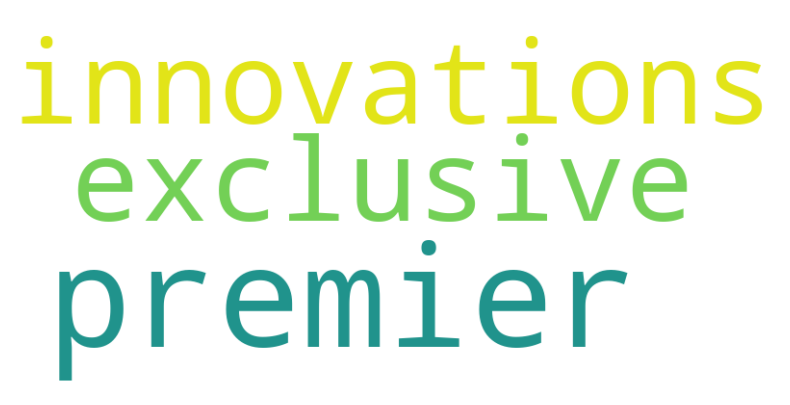

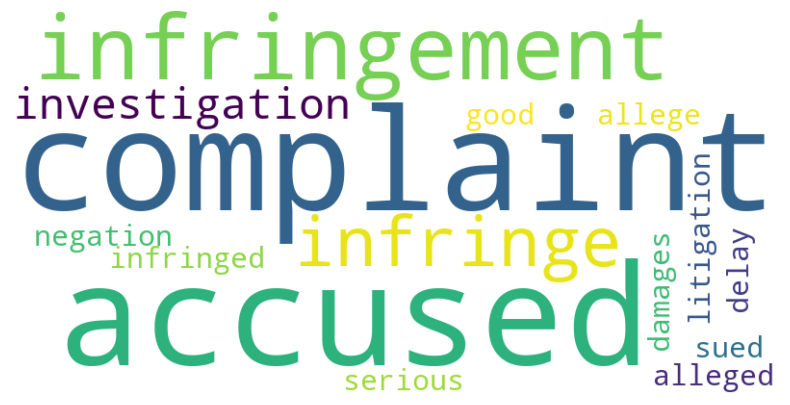

'negative'

In [113]:
# A sample output
article = '''Patent infringement pursued against same companies in U.S. District Court. Test "wasn't good".
SUNNYVALE, Calif.--(BUSINESS WIRE)--December 02, 2010--
Rambus Inc. (Nasdaq:RMBS), one of the world's premier technology licensing companies, today announced it has filed a complaint with the United States International Trade Commission (ITC) requesting the commencement of an investigation pertaining to products from Broadcom Corporation, Freescale Semiconductor, Inc., LSI Corporation, MediaTek Inc., NVIDIA Corporation and STMicroelectronics N. V. The complaint seeks an exclusion order barring the importation, sale for importation, or sale after importation of products from Broadcom, Freescale, LSI, NVIDIA and STMicroelectronics that infringe certain patents from the Dally1 family of patents, and of products from Broadcom, Freescale, LSI, MediaTek and STMicroelectronics that infringe certain patents from the Barth family of patents. In an earlier investigation requested by Rambus the ITC found that these same Barth patents were valid and infringed by NVIDIA products, and issued an exclusion order in July of this year.
"We have been attempting to license these companies for some time to no avail. One of the respondents frankly told us that the only way they would get serious is if we sued them. Others pursued a strategy of delay rather than negotiate a reasonable resolution," said Harold Hughes, president and chief executive officer at Rambus. "Rambus has invested hundreds of millions of dollars developing a portfolio of technologies that are foundational for many digital electronics. There is widespread knowledge within the industry about our patents including their use in standards-compatible products accused in these actions. In fairness to our shareholders and to our paying licensees, we take these steps to protect our patented innovations and pursue fair compensation for their use."
For the Dally patents, the accused semiconductor products from these companies include ones that incorporate PCI Express, certain Serial ATA, certain Serial Attached SCSI (SAS), and DisplayPort interfaces. In the case of the Barth patents, the accused semiconductor products include ones that incorporate DDR, DDR2, DDR3, mobile DDR, LPDDR, LPDDR2, and GDDR3 memory controllers. Accused semiconductor products in the complaint include graphics processors, media processors, communications processors, chip sets and other logic integrated circuits (ICs).
In addition to Broadcom, Freescale, LSI, MediaTek, NVIDIA and STMicroelectronics, the ITC complaint names companies whose products incorporate the accused semiconductor products and are imported, sold for importation, or sold after importation into the United States. These products include personal computers, workstations, servers, routers, mobile phones and other handheld devices, set-top boxes, Blu-ray players motherboards, plug-in cards, hard drives and modems. The ITC is expected to decide whether to initiate an investigation under this complaint within 30-45 days.
Rambus today also filed separate actions for patent infringement against Broadcom, Freescale, LSI, MediaTek and STMicroelectronics in the United States District Court for the Northern District of California. The lawsuits allege that semiconductor products with certain memory controllers and/or serial links from the above companies infringe certain patents from the Farmwald-Horowitz, Barth, and Dally patent families. In the case of MediaTek, only infringement of the Barth and Farmwald-Horowitz patents for certain memory controllers is alleged. Rambus also filed an action in the United States District Court for the Northern District of California against NVIDIA for infringement of certain Dally patents. The categories of accused semiconductor products in the District Court complaints include the same categories accused in the ITC complaint, as well as SDR memory controllers. Rambus is seeking injunctive relief barring the infringement, contributory infringement, and inducement to infringe the patents, as well as monetary damages.
Rambus management will discuss the filing of these actions during a special conference call today at 5:00 p.m. PT. The call will be webcast and can be accessed through the Rambus website. A replay will be available following the call on Rambus' Investor Relations website or for one week at the following numbers: (800) 642-1687 (domestic) or (706) 645-9291 (international) with ID# 29122159. Further information regarding these legal actions will be made available at http://investor.rambus.com in the Litigation Update section.
1 Rambus is the exclusive licensee for the Dally family of patents which are owned by Massachusetts Institute of Technology. This license was assigned to Rambus as a part of its 2003 acquisition of technology and IP from Velio Communications, a company founded by Dr. William Dally.
'''

toneCntWneg(lmdict, article,verbose=True)
lex(article,lmdict)

using basic bert architecture trained over uncased english text

In [15]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

In [16]:
pip install transformers

## Importing the requirements
Using a library such as Hugging Face's Transformers library to load and utilize the pre-trained BERT model for specific NLP task.

In [17]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

from collections import defaultdict
from textwrap import wrap

import pickle

from pydantic import BaseModel
from typing import Dict



%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from warnings import filterwarnings
filterwarnings('ignore')

In [18]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [19]:
import os
os.chdir ("/drive/MyDrive")
!ls

'20171009_195240[1] (1).jpg'
'20171009_195240[1].jpg'
'activity 2 report cognition.pdf'
 all-data.csv
 best_model_state.bin
 BrowserHistory_11_8_23.csv
 BrowserHistory_11_8_23.gsheet
'Cambridge 15 - Full Version.pdf'
'Cambridge IELT 12 Academic.pdf'
'Cambridge IELTS 14 Academic by Cambridge English (z-lib.org).pdf'
'Cambridge ielts6 Answers.pdf'
'Cambridge IELTS 7.pdf'
'Cambridge IELTS 9 Full.pdf'
'CG MODULE 1 NOTES.pdf'
'CG MODULE 2 NOTES.pdf'
'cm 2.png'
'Colab Notebooks'
'Computer Graphics with OpenGL (4th ed.) [Hearn, Baker & Carithers 2013].pdf'
'Copy of 1Z0A7707.JPG'
'Copy of 284A1565.JPG'
'final (1).pdf'
 final.pdf
 GDToT
'How to get started with Drive.pdf'
'IELTS Cambridge 13.pdf'
'IELTS Cambridge 13 test-3.pdf'
'IELTS Speaking by Adam Smith.pdf by Adam Smith (z-lib.org) (1).pdf'
'ielts synonimus.pdf'
 IMG_20171103_075616.jpg
 IMG_20171103_075622.jpg
 IMG_20171103_075625.jpg
 IMG_20171103_075629.jpg
 IMG_20171103_075638.jpg
 IMG-20181015-WA0020.jpg
 IMG_20190925_094743.jpg
 inbo

## Have a look at the data

In [91]:
df = pd.read_csv("all-data.csv", names = ["category", "text"], encoding='latin-1')

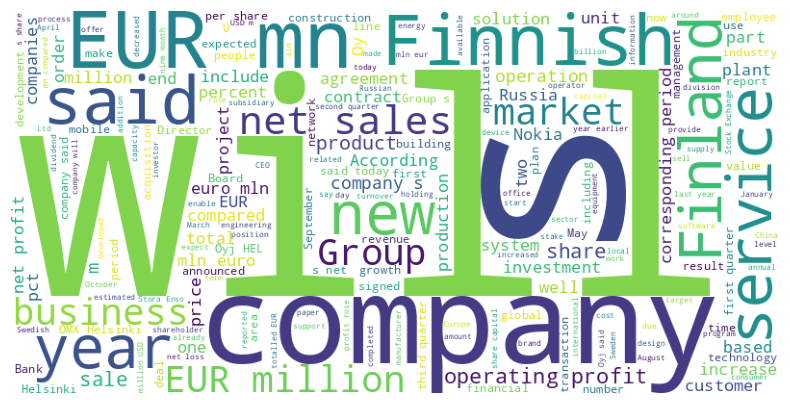

In [104]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'text_data' is your textual dataset
text_data = " ".join(df["text"])

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='hanning')
plt.axis('off')
plt.show()

In [21]:
df.head()

,category,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [22]:
df.shape

(4846, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  4846 non-null   object
 1   text      4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [24]:
df.category.value_counts()

neutral     2879
positive    1363
negative     604
Name: category, dtype: int64

no null values are present

neutral     2879
positive    1363
negative     604
Name: category, dtype: int64


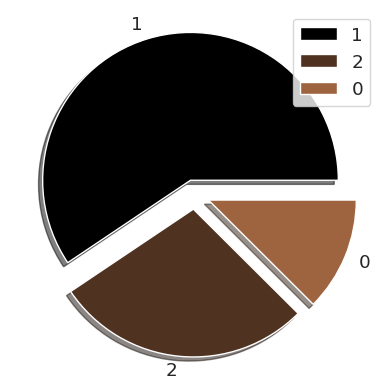

In [25]:
labels = [1,2,0]
sizes = df["category"].value_counts()
print(sizes)
colors = plt.cm.copper(np.linspace(0, 1, 5))
explode = [0.1, 0.1,0.1]
cmap = plt.get_cmap('Spectral')
plt.pie(sizes,labels = labels,colors = colors,shadow = True,explode = explode)
plt.legend()
plt.show()

<Axes: xlabel='category', ylabel='count'>

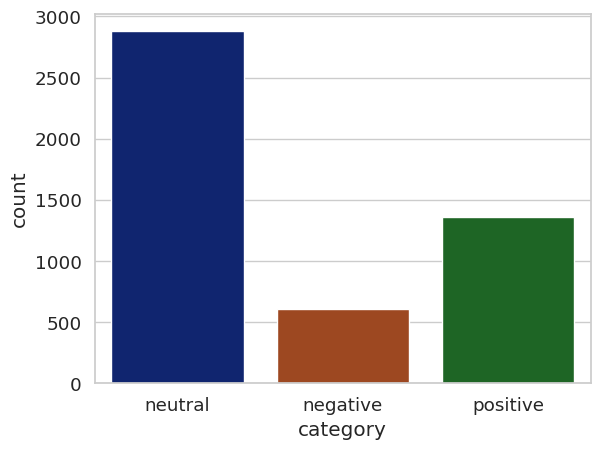

In [26]:
sns.countplot(x = "category", data = df,palette = 'dark')

##Data Preprocessing
LabelEncoder from scikit-learn to transform categorical labels in a DataFrame column into numerical representations.

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["label"] = label_encoder.fit_transform(df["category"])

In [28]:
df.head()

,category,text,label
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2


In [29]:
class_names = ['negative', 'neutral', 'positive']

In [30]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

### Choosing Sequence Length
creating a list (token_lens) that stores the lengths of tokenized sequences for each text in the 'text' column of the DataFrame.
It uses the Hugging Face tokenizer.encode method, which encodes the text into a sequence of tokens based on the specified parameters (max_length and truncation). , and then appends the length of the resulting list of tokens to the token_lens list.
to analyze the distribution of token lengths in a dataset,

In [79]:
token_lens = []

for txt in df['text']:
  tokens = tokenizer.encode(txt, max_length = 512, truncation = True)
  token_lens.append(len(tokens))
print(token_lens)

[27, 36, 43, 36, 51, 37, 58, 41, 34, 33, 41, 46, 47, 49, 48, 46, 69, 52, 30, 36, 27, 46, 64, 53, 50, 48, 39, 41, 40, 39, 46, 48, 44, 38, 38, 57, 32, 59, 26, 40, 50, 48, 52, 31, 10, 13, 16, 42, 34, 57, 36, 67, 49, 72, 52, 33, 56, 35, 60, 31, 26, 19, 80, 44, 36, 58, 52, 42, 37, 30, 43, 19, 29, 42, 62, 33, 34, 45, 57, 57, 40, 20, 35, 31, 54, 26, 51, 25, 36, 23, 38, 42, 58, 38, 42, 38, 42, 45, 15, 25, 40, 19, 29, 16, 19, 33, 34, 27, 41, 20, 26, 28, 26, 41, 27, 39, 25, 17, 26, 25, 21, 53, 26, 36, 47, 15, 21, 45, 32, 16, 39, 26, 35, 23, 24, 23, 31, 29, 58, 40, 31, 29, 40, 31, 41, 28, 50, 36, 38, 35, 24, 41, 21, 21, 18, 14, 36, 34, 25, 22, 41, 40, 41, 38, 37, 37, 43, 41, 42, 42, 42, 40, 40, 41, 42, 41, 9, 10, 23, 44, 24, 24, 24, 24, 19, 18, 38, 67, 21, 48, 70, 41, 61, 60, 68, 45, 60, 57, 54, 61, 64, 50, 22, 33, 34, 43, 32, 23, 46, 52, 19, 20, 48, 36, 34, 32, 32, 36, 36, 36, 37, 30, 20, 32, 47, 28, 26, 65, 59, 62, 63, 72, 22, 24, 65, 28, 24, 22, 25, 26, 23, 53, 20, 20, 26, 25, 26, 26, 22, 26, 

<Axes: ylabel='Density'>

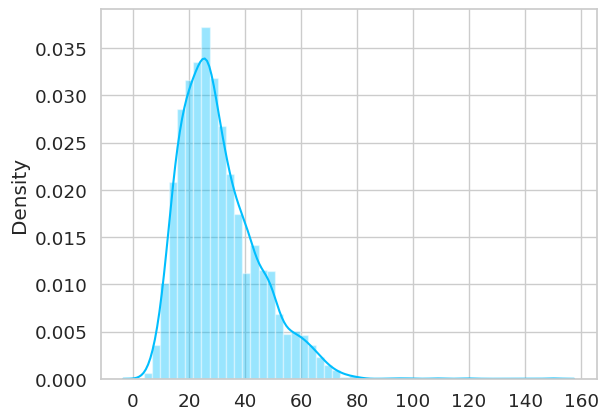

In [32]:
sns.distplot(token_lens)

We can choose the maximum sequence length of 88, as length of all the sequences in our dataset are below 88

(the larger the sequences, the slower the model is going to train)

In [66]:
MAX_LEN = 88
BATCH_SIZE = 8
EPOCHS = 10

### Building BERT Dataset
 creating a PyTorch dataset for text classification. It takes text and label data, a tokenizer, and a maximum length to which the input sequences should be padded or truncated. as input and provides methods to get the length of the dataset (__len__) and to get a specific item from the dataset (__getitem__).

Convert the text and label at the specified index (item) to Python variables.
Use the provided tokenizer (self.tokenizer) to tokenize and formatting  the input sequences, including special tokens and handling max length constraints.
Flatten the input IDs and attention mask to ensure they are one-dimensional.
Return a dictionary with the processed information.

A dictionary containing the processed data for a single item. This dictionary includes:
'text': The original text.
'input_ids': Tokenized and encoded input IDs for the text.
'attention_mask': Attention mask indicating which tokens are part of the input.
'label': The label converted to a PyTorch tensor with data type torch.long

In [34]:
class DataSet(Dataset):

  def __init__(self, text, label, tokenizer, max_len):
    self.text = text
    self.label = label
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.text)

  def __getitem__(self, item):
    text = str(self.text[item])
    label = self.label[item]

    encoding = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'text': text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'label': torch.tensor(label, dtype=torch.long)
    }

### Splitting the data
 scikit-learn to split your DataFrame (df) into training, validation, and test sets. Now, df_test is used for the test set, and the validation set (df_val) is derived from the remaining portion of the original test set.

  The training set is used to train the model, the validation set is used to tune hyperparameters and prevent overfitting, and the testing set is used to evaluate the model's performance on unseen data.

In [35]:
df_train, df_test = train_test_split(
  df,
  test_size=0.2,
  random_state=42
)
df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state=42
)

In [36]:
print(df_train,df_val,df_test)

      category                                               text  label
432    neutral  In Russia , Raisio 's Food Division 's home ma...      1
3071   neutral  Operators only need to learn how to use one de...      1
289   positive  The company expects its net sales in the first...      2
2588   neutral  The bridge will be 1.2 km long and is located ...      1
4121   neutral  Nokia and Capcom announced that Resident Evil ...      1
...        ...                                                ...    ...
4426  negative  The currency effect had a 3.0 pct , or 20 mln ...      0
466   positive  `` Lidskoe Pivo 's investment program foresees...      2
3092   neutral  Products include Consumer Electronics devices ...      1
3772   neutral  The bridge is part of the highway 14 developme...      1
860   positive  ( ADP News ) - Oct 1 , 2008 - Finnish consulti...      2

[3876 rows x 3 columns]       category                                               text  label
764   positive  Finnish co

In [37]:
df_train.shape, df_val.shape, df_test.shape

((3876, 3), (485, 3), (485, 3))

 It uses the DataSet class to create a PyTorch dataset and then creates a DataLoader to efficiently load and iterate over batches oftokenized data during training or evaluation.

In [38]:
def create_data_loader(df, tokenizer, max_len, batch_size):

  ds = DataSet(
    text = df.text.to_numpy(),
    label = df.label.to_numpy(),
    tokenizer = tokenizer,
    max_len = max_len
  )
  return DataLoader(
    ds,
    batch_size = batch_size,
    shuffle = True
  )

In [39]:
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [40]:
##example batch from training data loader

data = next(iter(train_data_loader))
data.keys()

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


dict_keys(['text', 'input_ids', 'attention_mask', 'label'])

In [41]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['label'].shape)

torch.Size([8, 88])
torch.Size([8, 88])
torch.Size([8])


## Model Building

In [42]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

### Sentiment Classifier
SentimentClassifier class defines a sentiment analysis model using BERT.
Adds a dropout layer (self.drop) with a dropout probability of 0.3.
Adds a linear layer (self.out) with  mapping from the BERT hidden size to the number of classes (n_classes)..
The forward method defines the forward pass of the model.
The BERT model is applied to the input, and both the hidden states and pooled output are returned. Here, you're using only the pooled output.
The pooled output goes through a dropout layer (self.drop) Dropout is a regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting..
The output of the dropout layer is passed through the linear layer This layer performs a linear transformation of the input based on the learned weights. (self.out), producing the final output.

In [43]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [44]:
print(len(class_names))
model = SentimentClassifier(len(class_names))
model = model.to(device)

3


### Optimizer and Loss Function
define a loss function (e.g., cross-entropy loss) and an optimizer (e.g., Adam) using the AdamW optimizer from the Hugging Face Transformers library.

In [45]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)

total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

### Model Training
 training loop for one epoch

In [46]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train() # Set the model to training mode

  losses = []  # List to store the losses during training
  correct_predictions = 0  # Variable to track the number of correct predictions

#Iterates through batches from the training data loader (data_loader).
#Transfers input data (input_ids, attention_mask, label) to the specified device.
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    label = d["label"].to(device)

   # Forward pass
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
 # Predictions and loss
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, label)

    correct_predictions += torch.sum(preds == label)
    losses.append(loss.item())
 # Backward pass - propagates loss and optimization - update model parameters
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Gradient clipping
    optimizer.step()
    scheduler.step() # Learning rate scheduling
    optimizer.zero_grad()
  # Calculate accuracy and average loss for the epoch
  return correct_predictions.double() / n_examples, np.mean(losses)

## Model Evaluation
 evaluating the model on a validation or test set.

In [47]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval() # Set the model to evaluation mode

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      label = d["label"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )

      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, label)
      correct_predictions += torch.sum(preds == label)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

### Accuracy on training data and validation data
 training your sentiment analysis model for a specified number of epochs and monitoring its performance on both the training and validation sets.

In [69]:
%%time
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  # Training
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')
  # Validation
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  # Logging training and validation metrics
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
 # Save the model if validation accuracy improves
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/10
----------
Train loss 0.06345824583579988 accuracy 0.9821981424148606
Val   loss 0.6463924691283343 accuracy 0.8701030927835052

Epoch 2/10
----------
Train loss 0.06620133569723322 accuracy 0.979360165118679
Val   loss 0.6501121666114472 accuracy 0.8701030927835052

Epoch 3/10
----------
Train loss 0.06455786604621476 accuracy 0.979876160990712
Val   loss 0.6463663948539522 accuracy 0.8701030927835052

Epoch 4/10
----------
Train loss 0.0659584538989518 accuracy 0.979360165118679
Val   loss 0.6463690235252783 accuracy 0.8701030927835052

Epoch 5/10
----------
Train loss 0.06314720214961442 accuracy 0.981424148606811
Val   loss 0.6527066949915263 accuracy 0.8701030927835052

Epoch 6/10
----------
Train loss 0.06942068345199061 accuracy 0.978844169246646
Val   loss 0.6624179550333972 accuracy 0.8701030927835052

Epoch 7/10
----------
Train loss 0.0642139506143441 accuracy 0.9801341589267285
Val   loss 0.6520532204532904 accuracy 0.8701030927835052

Epoch 8/10
----------
Train

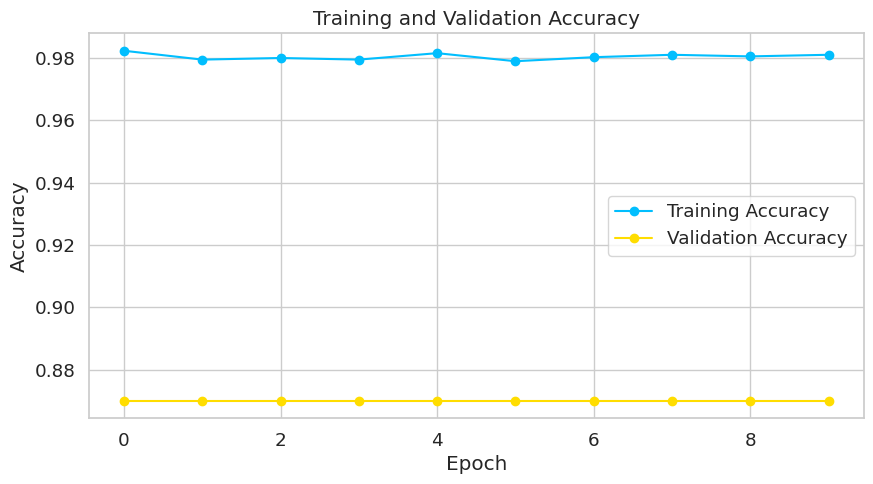

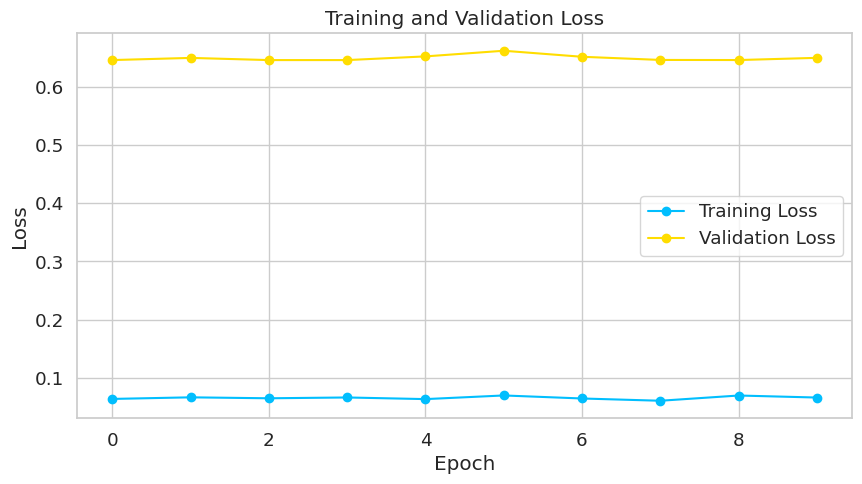

In [70]:
import matplotlib.pyplot as plt

# Extracting training history
train_acc = [acc.item() for acc in history['train_acc']]  # Move to CPU and extract value
train_loss = history['train_loss']
val_acc = [acc.item() for acc in history['val_acc']]  # Move to CPU and extract value
val_loss = history['val_loss']

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Training Accuracy', marker='o')
plt.plot(val_acc, label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Accuracy on test data
evaluating the model on the test set and extracting the accuracy.

In [67]:
%%time
history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  # Test data
  test_acc, test_loss = eval_model(
    model,
    test_data_loader,
    loss_fn,
    device,
    len(df_test)
  )

  print(f'Test   loss {test_loss} accuracy {test_acc}')
  print()
  # Logging testing metrics

  history['test_acc'].append(test_acc)
  history['test_loss'].append(test_loss)

Epoch 1/10
----------
Test   loss 0.6110825305279787 accuracy 0.8701030927835052

Epoch 2/10
----------
Test   loss 0.604250755983588 accuracy 0.8701030927835052

Epoch 3/10
----------
Test   loss 0.6042756766804158 accuracy 0.8701030927835052

Epoch 4/10
----------
Test   loss 0.6115474209788667 accuracy 0.8701030927835052

Epoch 5/10
----------
Test   loss 0.6197382379456835 accuracy 0.8701030927835052

Epoch 6/10
----------
Test   loss 0.6044377285422238 accuracy 0.8701030927835052

Epoch 7/10
----------
Test   loss 0.6096144369020905 accuracy 0.8701030927835052

Epoch 8/10
----------
Test   loss 0.6042409330247672 accuracy 0.8701030927835052

Epoch 9/10
----------
Test   loss 0.604646639406994 accuracy 0.8701030927835052

Epoch 10/10
----------
Test   loss 0.6175225663808037 accuracy 0.8701030927835052

CPU times: user 25.8 s, sys: 57.9 ms, total: 25.8 s
Wall time: 26.9 s


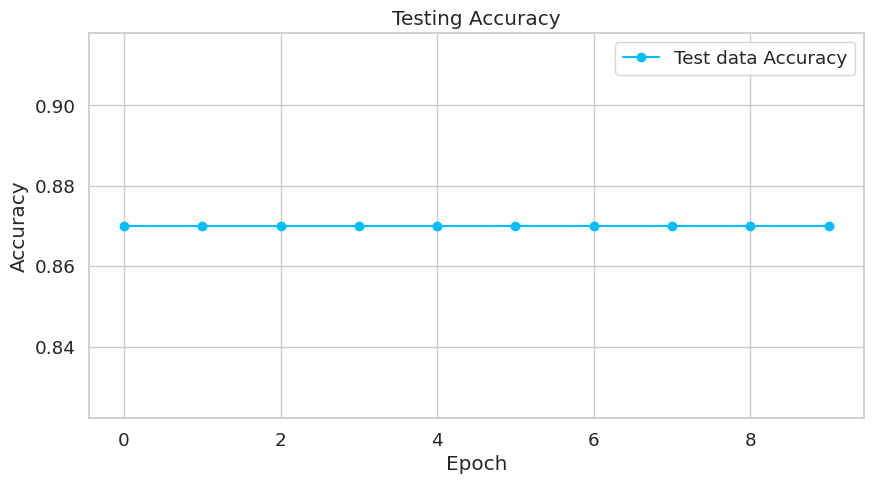

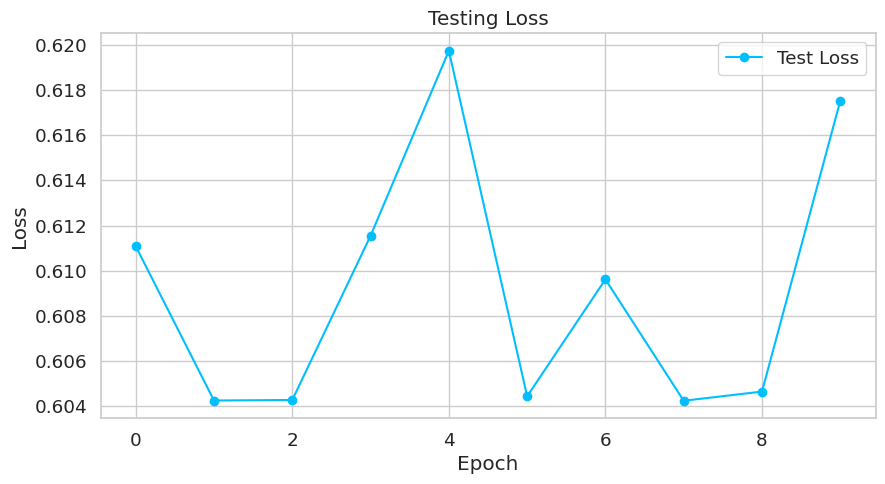

In [68]:
import matplotlib.pyplot as plt

# Extracting training history
test_acc = [acc.item() for acc in history['test_acc']]  # Move to CPU and extract value
test_loss = history['test_loss']

# Plotting training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(test_acc, label='Test data Accuracy', marker='o')
plt.title('Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(test_loss, label='Test Loss', marker='o')
plt.title('Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [51]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.8701030927835052

### Get Predictions
obtain predictions, prediction probabilities, and real values from your model on a test data loader.

In [52]:
import torch.nn.functional as F

def get_predictions(model, data_loader, device):
    model = model.eval()

    all_texts = []
    all_predictions = []
    all_prediction_probs = []
    all_real_values = []

    with torch.no_grad():
        for d in data_loader:
            texts = d["text"]
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            label = d["label"].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            _, preds = torch.max(outputs, dim=1)
            probs = F.softmax(outputs, dim=1)

            all_texts.extend(texts)
            all_predictions.extend(preds.cpu().numpy())
            all_prediction_probs.extend(probs.cpu().numpy())
            all_real_values.extend(label.cpu().numpy())

    return all_texts, all_predictions, all_prediction_probs, all_real_values


In [53]:
y_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader,
  device
)

In [54]:
print(y_texts)
print(y_pred)
print(y_pred_probs)
print(y_test)

["Previously , Vaahto Pulp has supplied headboxes with rectifier roll and dilution control technology for Stora Enso 's mill in Imatra , eastern Finland .", 'ALEXANDRIA , Va. , Nov. 5 -- Risto Kontturi of Rajamaki , Finland , and Jari Ylinen of Hyvinkaa , Finland , have developed an automated transportation system with a user-controlled transport selection .', "The offer , deemed too low by Finnlines ' board , stands until 4 pm tomorrow .", '`` This vessel order will help Aspo secure the long-term competitiveness of its fleet , both in terms of technology and pricing .', 'The board machine , which will have a wire width of 6.25 m and a design speed of 900 m-min , will produce close to 1,400 tonnes of folding boxboard per day .', 'Finnish elevators and escalators maker KONE Corporation said on Tuesday ( 18 March ) that it has received a major order from Sir Robert McAlpine to supply all elevators and escalators for the Watermark Place project in the City of London .', "At the end of Mar

### Classification Report
Precision: 0.89 (89% of the predicted negative instances were correct)
ratio of true positive predictions to the total predicted positives. It measures the accuracy of the positive predictions.
Formula: Precision = TP / (TP + FP)

Recall: 0.88 (88% of the actual negative instances were captured)
ratio of true positive predictions to the total actual positives. It measures the ability of the model to capture all relevant instances.
Formula: Recall = TP / (TP + FN)

F1-Score: 0.88 (harmonic mean of precision and recall)
 harmonic mean of precision and recall. It provides a balance between precision and recall, especially when there is an imbalance between the classes.
Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)

Support: 56 instances in the negative class. number of actual occurrences of the class in the specified dataset. It represents the number of instances for each class.

Accuracy: 0.87 (87% of all predictions were correct)  ratio of correctly predicted instances to the total instances. It provides an overall measure of the model's correctness.
Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN)

Macro Avg F1-Score: 0.86 (average F1-score across classes, treating all classes equally) calculates metrics for each class independently and then takes the average. It treats all classes equally, regardless of their size.

Weighted Avg F1-Score: 0.87 (weighted average F1-score, considering the class imbalance) calculates metrics for each class independently and then takes the weighted average, where each class's contribution is weighted by its presence in the true data.

These metrics provide a comprehensive evaluation of the model's performance across different classes. The high F1-Scores and accuracy suggest that the model is performing well on this particular dataset.





In [55]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

    negative       0.84      0.86      0.85        56
     neutral       0.90      0.89      0.90       285
    positive       0.82      0.83      0.82       144

    accuracy                           0.87       485
   macro avg       0.85      0.86      0.86       485
weighted avg       0.87      0.87      0.87       485



### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. In a confusion matrix, each row represents the instances in an actual class, while each column represents the instances in a predicted class.



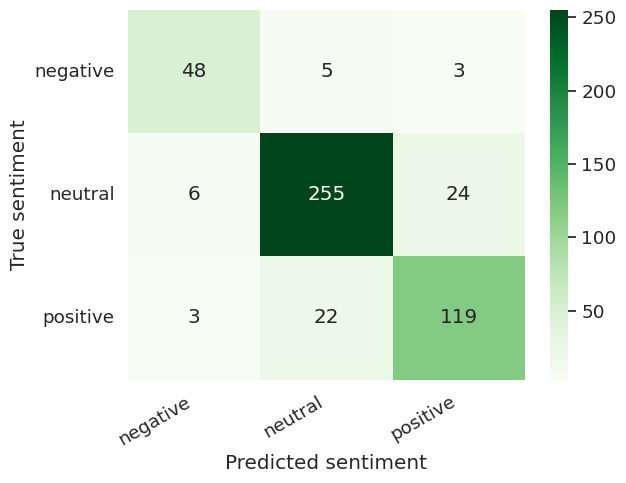

In [56]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens")

  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')

  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

### Visualization of sentiment, confidence and probability

In [57]:
idx = 4 # Choose the index of the sample you want to display

text = y_texts[idx]  # Assuming y_texts is a list or array containing your text samples
true_sentiment = y_test[idx] # Assuming y_test is a list or array containing the true sentiment labels
# Print the wrapped text
print("\n".join(wrap(text)))
print()
# Print the true sentiment label
print(f'True sentiment: {class_names[true_sentiment]}')

The board machine , which will have a wire width of 6.25 m and a
design speed of 900 m-min , will produce close to 1,400 tonnes of
folding boxboard per day .

True sentiment: neutral


In [58]:
##Creating a DataFrame to display the predicted probabilities for each class for a specific sample.
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})
print(pred_df)

  class_names    values
0    negative  0.000239
1     neutral  0.999420
2    positive  0.000341


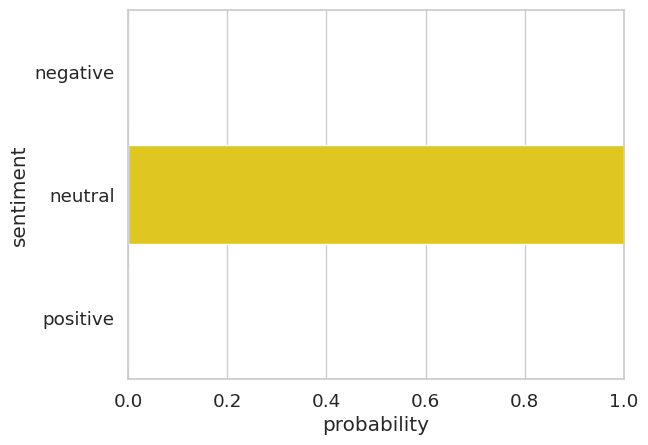

In [59]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

### Predicting on Raw Text

In [60]:
df

,category,text,label
0,neutral,"According to Gran , the company has no plans t...",1
1,neutral,Technopolis plans to develop in stages an area...,1
2,negative,The international electronic industry company ...,0
3,positive,With the new production plant the company woul...,2
4,positive,According to the company 's updated strategy f...,2
...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,0
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,1
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,0
4844,negative,Net sales of the Paper segment decreased to EU...,0


In [61]:
text = df['text'][1862]
print(text)
label = df['label'][1862]
print(label)
##The encode_plus method from the Hugging Face tokenizer is a versatile method for tokenizing and formatting input sequences for various natural language processing tasks.
encoded_review = tokenizer.encode_plus(
  text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)
##The encode_plus method returns a dictionary containing the following elements:

##'input_ids': The token IDs of the input sequence.
##'attention_mask': The attention mask indicating which tokens are actual words (1) and which are padding (0).
##'token_type_ids': The token type IDs, returned only if return_token_type_ids is True.
print(encoded_review)

So far the company has awarded more than $ 350,000 worth of tools and materials .
1
{'input_ids': tensor([[ 101, 2061, 2521, 1996, 2194, 2038, 3018, 2062, 2084, 1002, 8698, 1010,
         2199, 4276, 1997, 5906, 1998, 4475, 1012,  102,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [62]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'Review text: {text}')
print(f'Sentiment  : {class_names[prediction]}')

Review text: So far the company has awarded more than $ 350,000 worth of tools and materials .
Sentiment  : positive


##Saving the model

In [63]:
# torch.save(model, '/drive/MyDrive/model')

# saved_model = torch.load('/drive/MyDrive/model')

In [64]:
# pickle.dump(model, open("model_gb.pkl", "wb"))